# Lab1. 线性回归

1. 读取数据
2. 可视化
3. 计算损失函数
4. 解析法求解最优解
5. 梯度下降
6. 等高线代价函数

# 1.单变量线性回归

## 1.1 读取数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex1data1 = 'ex1data1.txt'
data1 = np.loadtxt(ex1data1,delimiter=',')
print(data1.shape, data1.ndim)

(97, 2) 2


## 1.2 可视化数据

(97,) 1


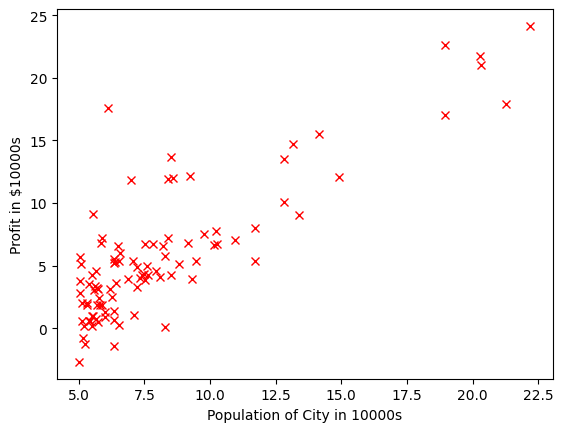

In [3]:
x=data1[:,0]
y=data1[:,1]
print(x.shape, x.ndim)

#使用plt.xlabel plt.ylabel plt.plot函数来进行数据可视化
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
plt.plot(x, y, 'xr')

## 1.3 训练线性回归模型
### 1.3.1 数据预处理

In [4]:
#使用m存放数据点的个数
#使用np.ones创建名为x0的二维数组，规模为m*1
#使用x1存放读入数据第一列“人口数量”，存为列向量
#使用np.hstack函数将x0和x1进行合并存放于x,打印x
#使用y存放读入数据第二列“收益”，存为列向量
#使用np.zeros初始化theta,规模为2*1,打印theta
m=data1.shape[0] # m为是数据样本个数
 
x0 = np.ones((m,1))
x1 = data1[:, [0]] #在本实验中，data1[:,0]返回的是⼀维数组，使⽤data1[:, [0]]会返回m*1的⼆维数组
 
X = np.hstack((x0, x1)).T #hstack为⽔平拼接函数
print(X)
y = data1[:, [1]].T
theta=np.zeros((2,1))
print("theta: \n", theta)

[[ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.    ]
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
   5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
   6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
  10.957  13.176  22

### 1.3.2 代价函数

In [5]:
#利用numpy中的函数编写代价函数
#注意避免编写一个完整的长公式，分步计算便于调试
#注意数组维度
def computeCost(X, y, w):
    m = y.shape[1]
    L = 0
    temp=w.T@X-y
    se=temp @ temp.T
    L=se/2/m
    return L
    

print(computeCost(X, y, theta))

[[32.07273388]]


### 1.3.3 用于单变量线性回归的梯度下降法算法

In [6]:
#定义学习率alpha
#迭代次数iteration
#使用cost存放每次迭代后计算出的代价函数的取值
#进行梯度下降

def gradientDescent(X, y, w, alpha, num_iters):
    m = X.shape[1]
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        fx=w.T@X
        err=fx-y
        grad = err@X.T
        w=w-alpha*grad.T/m
        cost_history[i] = computeCost(X, y, w)
    return w, cost_history
alpha = 0.01   # alpha是学习率
num_iters = 1500   # 迭代次数
w, cost_history = gradientDescent(X, y, theta, alpha, num_iters)
print(w)


[[-3.63029144]
 [ 1.16636235]]


C:\Users\the dark\AppData\Local\Temp\ipykernel_11652\1172917954.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = computeCost(X, y, w)


### 1.3.4 通过求导法直接计算最优解

In [7]:
xxt = np.dot(X, X.T)
xyt = np.dot(X, y.T)
xxt_inv = np.linalg.inv(xxt)

theta_mat = np.matmul(np.linalg.inv(np.matmul(X, X.T)), np.matmul(X, y.T))
print(theta_mat)

[[-3.89578088]
 [ 1.19303364]]


## 1.4 使用训练得到的模型进行预测并可视化结果

In [8]:
#使用训练的带的参数，代入x0=5.0求得对应的y0
#使用训练的带的参数，代入x1=25.0求得对应的y1
x0 = 5.0
y0 = w[0] + x0*w[1]
x1 = 25.0
y1 = w[0] + x1*w[1]
print(y0, y1)


[2.20152031] [25.52876732]


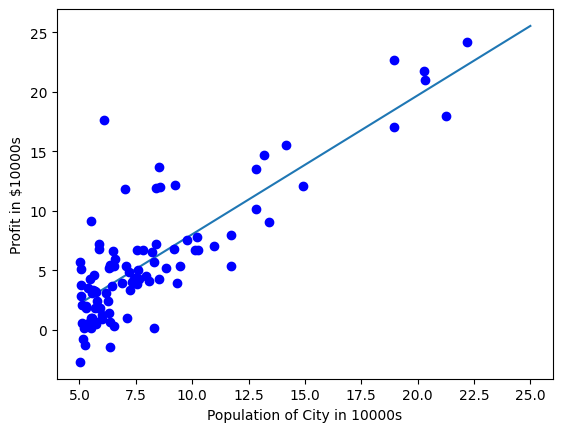

In [9]:
#利用plt.xlabel plt.ylabel设定坐标轴名称
#利用plt.plot画出拟合的直线，可利用上一步计算得到的两个坐标点plt.plot((x0, x1), (y0, y1))
#利用plt.plot画出原始数据散点图
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
plt.plot((x0,x1),(y0,y1))
plt.plot(data1[:,0], data1[:,1], "ob")

## 1.5 可视化线性回归的代价函数

Visualizing L(w_0, w_1) ...


C:\Users\the dark\AppData\Local\Temp\ipykernel_11652\4039153410.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_vals[i, j] = computeCost(X, y, np.array([[w0_vals[i]], [w1_vals[j]]]))


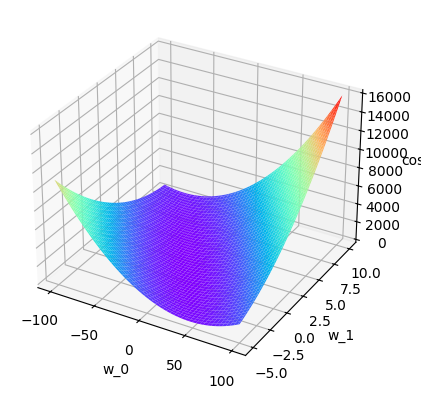

In [10]:
print('Visualizing L(w_0, w_1) ...')
w0_vals = np.linspace(-100, 100, 100)
w1_vals = np.linspace(-5, 10, 100)
cost_vals = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        cost_vals[i, j] = computeCost(X, y, np.array([[w0_vals[i]], [w1_vals[j]]]))
cost_vals = cost_vals.T

w0_vals_m, w1_vals_m = np.meshgrid(w0_vals, w1_vals)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(w0_vals_m, w1_vals_m, cost_vals, cmap='rainbow')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('cost')
plt.show()

## 1.6 绘制等高线代价函数

C:\Users\the dark\AppData\Local\Temp\ipykernel_11652\1952509963.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_val[i, j] = computeCost(X, y, theta_val)


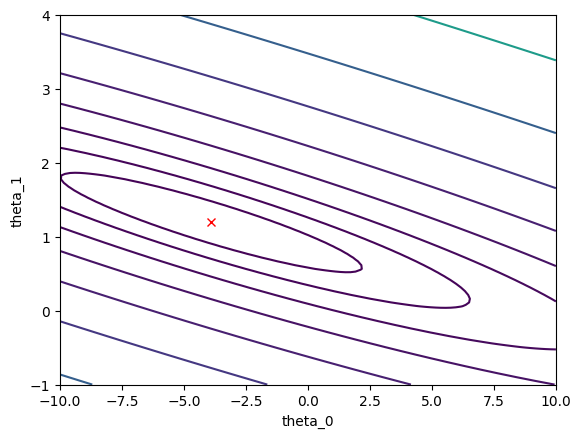

In [11]:
theta0_val = np.linspace(-10, 10, 100)
theta1_val = np.linspace(-1, 4, 100)
cost_val = np.zeros((len(theta0_val), len(theta1_val)))
for i in range(len(theta0_val)):
    for j in range(len(theta1_val)):
        theta_val = np.array([[theta0_val[i]], [theta1_val[j]]])
        cost_val[i, j] = computeCost(X, y, theta_val)

cost_val = cost_val.T

plt.contour(theta0_val, theta1_val, cost_val, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta_mat[0], theta_mat[1], 'rx')
plt.show()

# 2.多变量线性回归

## 2.0 读取数据

In [12]:
#使用m存放数据点的个数
#使用x存放读入数据，取[0，2）这个区间的列，不包括2，存为列向量
#使用y存放读入数据，存为列向量
#使用np.zeros初始化theta,规模为2*1,打印theta
#可以输出前10行数据，查看数据内容
data = np.loadtxt('ex1data2.txt', delimiter=',')
x=data[:,0:2]
y=data[:,[2]]

m=data.shape[0]
theta=np.zeros((2,1))
print(f"Size of data is : {data.shape} , and dimension is {data.ndim}")
print(y.shape)  # y的维度
print(f"First 10 examples from the database( {data.shape[0]} ):")
for i in range(10):
    print(f"x = ( {x[i][0]} , {x[i][1]} ); y =  {y[i][0]}")


Size of data is : (47, 3) , and dimension is 2
(47, 1)
First 10 examples from the database( 47 ):
x = ( 2104.0 , 3.0 ); y =  399900.0
x = ( 1600.0 , 3.0 ); y =  329900.0
x = ( 2400.0 , 3.0 ); y =  369000.0
x = ( 1416.0 , 2.0 ); y =  232000.0
x = ( 3000.0 , 4.0 ); y =  539900.0
x = ( 1985.0 , 4.0 ); y =  299900.0
x = ( 1534.0 , 3.0 ); y =  314900.0
x = ( 1427.0 , 3.0 ); y =  198999.0
x = ( 1380.0 , 3.0 ); y =  212000.0
x = ( 1494.0 , 3.0 ); y =  242500.0


## 2.1 特征规范化

In [13]:
#特征规范化
#计算mu、sigma
#返回规范化后的结果
def featureNormalize(x):
    mu = np.mean(x, axis = 0)
    std_sigma = np.std(x, axis = 0, ddof = 1) # ddof = k,最后平⽅和除以n - k 
    return (x - mu) / std_sigma, mu, std_sigma

## 2.2使用向量法实现多变量的梯度下降法

### 2.2.1 向量化代价函数

In [14]:
#根据这个向量化的代价函数(请看实验说明书)，升级原先的computeCost()到computeCostMulti()函数
def computeCostMulti(X, y, theta):
    m=y.shape[0]
    #print(m)
    diff=X @ theta-y
    L=(1/2/m)*diff.T@diff
    #print(L.shape)
    return L

### 2.2.2 向量化多变量梯度下降法

In [15]:
#根据向量化的梯度(请看实验说明书)，升级gradientDescent()到gradientDescentMulti()函数。
#定义学习率alpha
#迭代次数iteration
#使用cost存放每次迭代后计算出的代价函数的取值
#进行梯度下降

def gradientDescentMulti(X,y,theta, alpha, num_iters):
    m= X.shape[0]
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        diff =X@ theta - y
        delta = alpha * x.T @ diff / m
        theta= theta - delta
        cost_history[i]= computeCostMulti(x,y, theta)
    return theta, cost_history

### 2.2.3 房价预测(先对输入数据进行规范化)

In [16]:
#先规范化数据
#使用vstack，拓展规范化后的数据
#可以打印出数据查看数据内容
x0 = np.ones((data.shape[0],1))
x,mu, std_sigma= featureNormalize(x)
x= np.hstack((x0,x))
print(x,"\n", mu, std_sigma)
y = data[:, 2][:, np.newaxis]

[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648433e+

### 2.2.4 通过学习曲线（Learning Curve）选择合适的学习率（Learning Rate）

C:\Users\the dark\AppData\Local\Temp\ipykernel_11652\1156421379.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i]= computeCostMulti(x,y, theta)


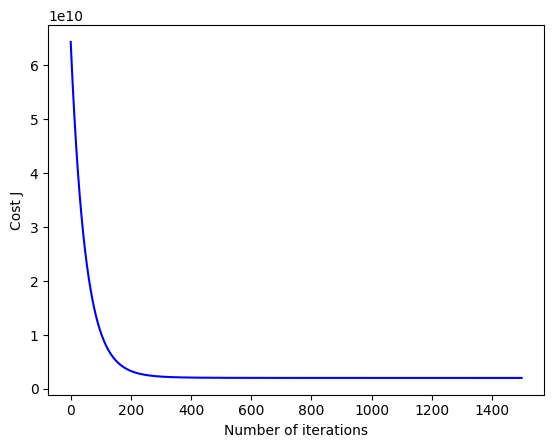

In [17]:
theta = np.zeros((x.shape[1], 1))
#print(computeCostMulti(x, y, theta))
#print(((theta.T@x-y)@(theta.T@x-y).T).shape)
theta_star, J_hist = gradientDescentMulti(x, y, theta, 0.01, 1500)
#print("cost=",J_hist)
# print(theta_star)
#绘制学习曲线

line=J_hist[0]
colum=J_hist[1]
#
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.plot(range(num_iters), J_hist, "b")

## 2.3 使用解析法最小化代价函数

In [18]:
#编写公式直接求取theta最优解
theta_mat=np.linalg.inv(x.T @ x) @ x.T @ y
print(theta_mat)

[[340412.65957447]
 [110631.05027885]
 [ -6649.47427082]]


## 2.4 使用训练得到的模型进行预测

In [19]:
#使用训练得到的模型进行预测
#注意，输入的数据需要规范化
x_test = [[1, (1650 - mu[0]) / std_sigma[0], (3 - mu[1]) / std_sigma[1]]]
y_matPred = x_test @ theta_mat
print(y_matPred[0][0])

293081.4643348962
